# Reduced Data Exploration

We used UMAP to reduce the dimensionality of the data. Now, we can reasonably cluster and create a classifier for the data

In [119]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import umap
import hdbscan

In [120]:
primary = pd.read_csv('../data/processed/primary_reduction_neighbors_500_components_100.csv', index_col='Unnamed: 0')
primary_viz = pd.read_csv('../data/meta/primary_tsne.tsv', sep='\t', header=None)
primary.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.112212,4.939317,5.918829,4.992411,0.680870,4.515995,4.859891,0.939652,4.603960,5.820034,...,2.658799,3.239437,3.072903,4.770635,6.574416,1.331290,5.788809,5.957347,7.925653,1.615880
1,1.152074,4.962815,5.925398,4.963470,0.664598,4.513293,4.850766,0.949062,4.608469,5.814752,...,2.644206,3.242347,3.072560,4.773752,6.568346,1.327594,5.808791,5.962403,7.924136,1.620949
2,1.165608,4.952626,5.918480,4.931909,0.688744,4.516660,4.864515,0.943799,4.603037,5.822249,...,2.670064,3.246485,3.074335,4.781677,6.581122,1.335095,5.769033,5.959348,7.922153,1.616583
3,1.136728,4.941747,5.933627,4.942926,0.688973,4.511244,4.863203,0.971335,4.603231,5.814647,...,2.665762,3.241148,3.078053,4.774774,6.571847,1.332158,5.787616,5.953503,7.926947,1.616524
4,1.114921,4.933242,5.921372,4.980308,0.692148,4.513679,4.861610,0.937366,4.602662,5.820196,...,2.666627,3.239076,3.074098,4.770308,6.574755,1.332116,5.781287,5.955782,7.925634,1.614264


Now let's run clustering on the cells

In [121]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
clusters = clusterer.fit(primary)
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [122]:
primary['label'] = clusters.labels_

In [123]:
primary_viz['label'] = clusters.labels_

In [124]:
primary_viz

,0,1,2,label
0,AAACCTGAGCTGCCCA_50646,51407.0,23100.0,-1
1,AAACCTGAGCTTATCG_50647,52530.0,28725.0,-1
2,AAACCTGAGTATGACA_50652,27880.0,45612.0,-1
3,AAACCTGAGTCGCCGT_50654,34893.0,51146.0,-1
4,AAACCTGCACCAGCAC_50657,27217.0,48240.0,-1
...,...,...,...,...
189404,CS22_CTTAACTCAGTAGAGC_6016,22971.0,60653.0,20
189405,CS22_GGATGTTTCGACCAGC_6380,22858.0,60794.0,20
189406,CS22_GCTGCTTAGCACCGTC_6308,49952.0,8735.0,20
189407,CS22_ATAGACCTCCTAGTGA_5271,34563.0,360.0,20


In [125]:
primary_viz = primary_viz.rename({0: 'cell'}, axis=1).set_index('cell')

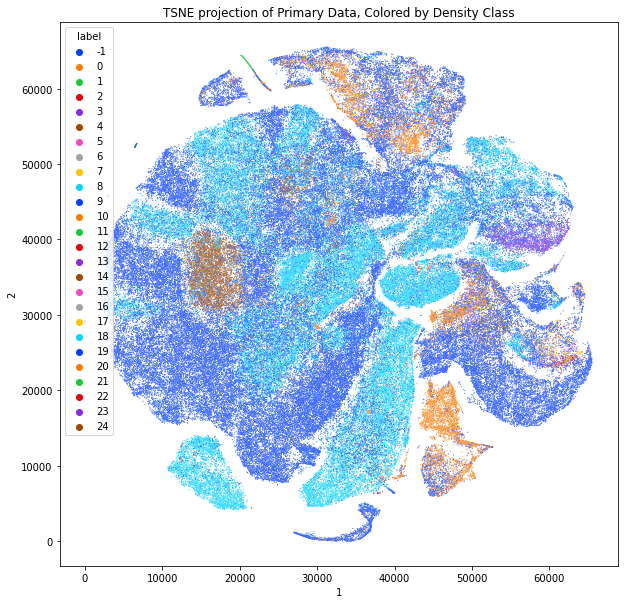

In [126]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(
    x=1, 
    y=2, 
    data=primary_viz,
    hue='label',
    legend='full',
    ax=ax,
    s=1,
    palette='bright'
)

plt.title(f'TSNE projection of Primary Data, Colored by Density Class')
plt.show()

In [128]:
np.unique(clusters.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24])

In [129]:
clusters.labels_

array([-1, -1, -1, ..., 20, 20, 20])

In [132]:
from collections import Counter

dict(zip(Counter(clusters.labels_).keys(), Counter(clusters.labels_).values()))

{-1: 31416,
 1: 238,
 23: 65,
 24: 11439,
 18: 61973,
 6: 64,
 22: 110,
 2: 45,
 21: 69,
 12: 546,
 20: 4260,
 3: 82,
 10: 54,
 15: 64,
 16: 53,
 17: 59,
 7: 561,
 19: 70286,
 11: 286,
 5: 22,
 13: 1795,
 9: 28,
 14: 28,
 8: 20,
 0: 5825,
 4: 21}